17.networkx.ipynb

下载
WWW Data download
http://www3.nd.edu/~networks/resources.htm
World-Wide-Web: [README] [DATA] Réka Albert, Hawoong Jeong and Albert-László Barabási: Diameter of the World Wide Web Nature 401, 130 (1999) [ PDF ]

In [3]:
%matplotlib inline
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [4]:
import networkx as nx

G=nx.Graph() # G = nx.DiGraph() # 有向网络
# 添加（孤立）节点
G.add_node("spam")
# 添加节点和链接
G.add_edge(1,2)

print(G.nodes())

print(G.edges())

[1, 2, 'spam']
[(1, 2)]


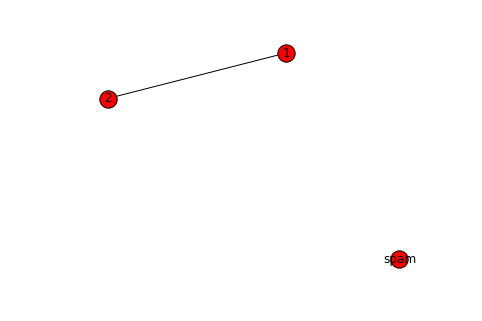

In [5]:
# 绘制网络
nx.draw(G, with_labels = True)

In [6]:
import sys
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [7]:
G = nx.Graph()
n = 0
with open ('F:/test/wwwdatgz.txt') as f:
    for line in f:
        n += 1
        if n % 10**4 == 0:
            flushPrint(n)
        x, y = line.rstrip().split(' ')
        G.add_edge(x,y)

1490000

In [17]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 68714\nNumber of edges: 120006\nAverage degree:   3.4929'

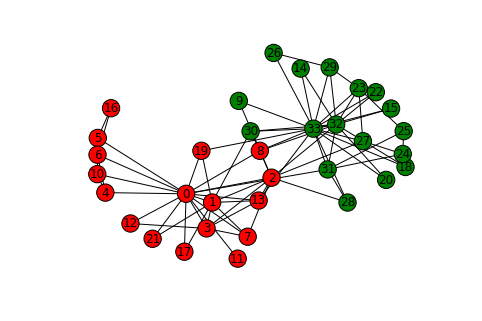

In [9]:
G = nx.karate_club_graph()
 
clubs = [G.node[i]['club'] for i in G.nodes()]
colors = []
for j in clubs:
    if j == 'Mr. Hi':
        colors.append('r')
    else:
        colors.append('g')
 
nx.draw(G,  with_labels = True, node_color = colors)

In [10]:
G.node[1] # 节点1的属性

{'club': 'Mr. Hi'}

In [11]:
G.edge.keys()[:3] # 前三条边的id

[0, 1, 2]

In [12]:
nx.info(G)

"Name: Zachary's Karate Club\nType: Graph\nNumber of nodes: 34\nNumber of edges: 78\nAverage degree:   4.5882"

In [13]:
G.nodes()[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
G.edges()[:3]

[(0, 1), (0, 2), (0, 3)]

In [15]:
G.neighbors(1)

[0, 2, 3, 7, 13, 17, 19, 21, 30]

In [16]:
nx.average_shortest_path_length(G) 

2.408199643493761

## 直径

In [17]:
nx.diameter(G)#返回图G的直径（最长最短路径的长度）

5

## 密度

In [18]:
nx.density(G)

0.13903743315508021

In [19]:
nodeNum = len(G.nodes())
edgeNum = len(G.edges())

2.0*edgeNum/(nodeNum * (nodeNum - 1))

0.13903743315508021

## 聚集系数

In [21]:
cc = nx.clustering(G)
cc.items()[:5]

[(0, 0.15),
 (1, 0.3333333333333333),
 (2, 0.24444444444444444),
 (3, 0.6666666666666666),
 (4, 0.6666666666666666)]

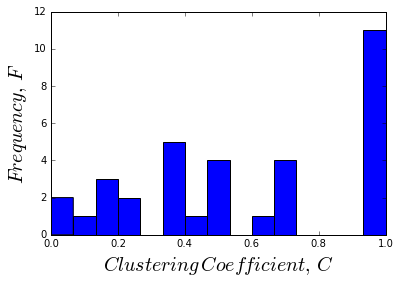

In [22]:
plt.hist(cc.values(), bins = 15)
plt.xlabel('$Clustering \, Coefficient, \, C$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)
plt.show()

## 匹配系数

In [24]:
nx.degree_assortativity_coefficient(G) #计算一个图的度匹配性。

-0.47561309768461457

In [25]:
Ge=nx.Graph()
Ge.add_nodes_from([0,1],size=2)
Ge.add_nodes_from([2,3],size=3)
Ge.add_edges_from([(0,1),(2,3)])
print(nx.numeric_assortativity_coefficient(Ge,'size'))

1.0


10
100
1000
10000


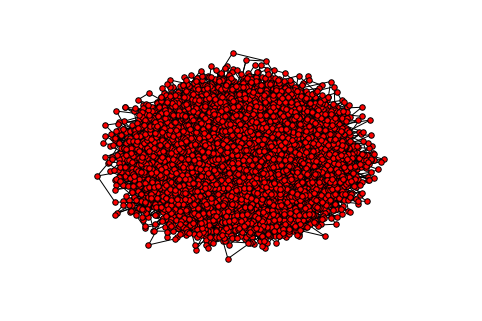

In [26]:
Ns = [i*10 for i in [1, 10, 100, 1000]]
ds = []
for N in Ns:
    print N
    BA= nx.random_graphs.barabasi_albert_graph(N,2)
    d = nx.average_shortest_path_length(BA)
    ds.append(d)
pos = nx.spring_layout(BA)          #定义一个布局，此处采用了spring布局方式
nx.draw(BA,pos,with_labels=False,node_size = 30)  #绘制图形
plt.show()

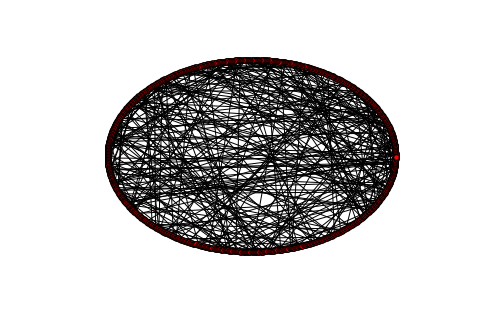

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
WS = nx.random_graphs.watts_strogatz_graph(800,4,0.2)  #生成包含200个节点、每个节点4个近邻、随机化重连概率为0.3的小世界网络
pos = nx.circular_layout(WS)          #定义一个布局，此处采用了circular布局方式
nx.draw(WS,pos,with_labels=False,node_size = 30)  #绘制图形
plt.show()